In [1]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

import numpy as np
import matplotlib.pyplot as plt

In [28]:
#training constants
BATCH_SIZE = 64
N_EPOCH = 30
N_CLASSES = 100
VERBOSE = 1
VALIDATION_SPLIT = 0.2
# OPTIM = Adam(learning_rate=0.0001)
OPTIM = SGD()

In [3]:
# CIFAR_100 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

In [4]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data()

print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


169001437/169001437 [==============================] - 13s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [29]:
# network definition

model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(512, (3, 3), padding='same'))
# model.add(Activation('elu'))
# model.add(Conv2D(512, (3, 3)))
# model.add(Activation('elu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
# model.add(Dense(1024))
model.add(Activation('elu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN network definition.')

CNN network definition.


In [30]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 activation_20 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 activation_21 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 128)       0         
                                                      

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest')

In [ ]:
# datagen.fit(input_X_train)

# # train by fitting the model on batches with real-time data augmentation
# history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)


Epoch 1/30


<ipython-input-26-177b6c5f6323>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)


 70/781 [=>............................] - ETA: 1:48 - loss: 4.5974 - accuracy: 0.0158

KeyboardInterrupt: 

In [31]:
# training/fitting of the DNN model

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/30
625/625 [==============================] - 20s 31ms/step - loss: 4.3851 - accuracy: 0.0406 - val_loss: 4.0353 - val_accuracy: 0.1007
Epoch 2/30
625/625 [==============================] - 19s 30ms/step - loss: 3.9736 - accuracy: 0.1016 - val_loss: 3.7323 - val_accuracy: 0.1512
Epoch 3/30
625/625 [==============================] - 19s 31ms/step - loss: 3.7332 - accuracy: 0.1420 - val_loss: 3.4860 - val_accuracy: 0.2011
Epoch 4/30
625/625 [==============================] - 19s 31ms/step - loss: 3.5335 - accuracy: 0.1758 - val_loss: 3.3154 - val_accuracy: 0.2242
Epoch 5/30
625/625 [==============================] - 19s 31ms/step - loss: 3.3778 - accuracy: 0.2059 - val_loss: 3.2156 - val_accuracy: 0.2391
Epoch 6/30
625/625 [==============================] - 19s 31ms/step - loss: 3.2641 - accuracy: 0.2236 - val_loss: 3.1009 - val_accuracy: 0.2647
Epoch 7/30
625/625 [==============================] - 19s 31ms/step - loss: 3.1529 - accuracy: 0.2470 - val_loss: 3.0298 - val_accuracy:

In [44]:
import pickle

with open("histories.pkl", 'rb') as f:
  histories = pickle.load(f)
# histories.append([history,model,BATCH_SIZE,type(OPTIM),'SGD'])
[print(h) for h in histories]
with open("histories.pkl", 'wb') as f:
  pickle.dump(histories, f)

[<keras.src.callbacks.History object at 0x7b35ac02b2e0>, <keras.src.engine.sequential.Sequential object at 0x7b35ac174be0>, 64, <class 'keras.src.optimizers.legacy.adam.Adam'>]
[<keras.src.callbacks.History object at 0x7b35ac184a90>, <keras.src.engine.sequential.Sequential object at 0x7b34b5d7b0d0>, 64, <class 'keras.src.optimizers.legacy.adam.Adam'>, 'relu']
[<keras.src.callbacks.History object at 0x7b34b5fcdab0>, <keras.src.engine.sequential.Sequential object at 0x7b34b5c93820>, 64, <class 'keras.src.optimizers.legacy.adam.Adam'>, '1024 dense']
[<keras.src.callbacks.History object at 0x7b34b5d7a0b0>, <keras.src.engine.sequential.Sequential object at 0x7b34b5ddbe80>, 64, <class 'keras.src.optimizers.legacy.adam.Adam'>, '2 Less convolve']
[<keras.src.callbacks.History object at 0x7b35ac02a2c0>, <keras.src.engine.sequential.Sequential object at 0x7b34b5c6bf40>, 64, <class 'keras.src.optimizers.legacy.adam.Adam'>, 'Extra Convolve']
[<keras.src.callbacks.History object at 0x7b3652f88e20>,

In [42]:
# histories.pop()
del histories[3]

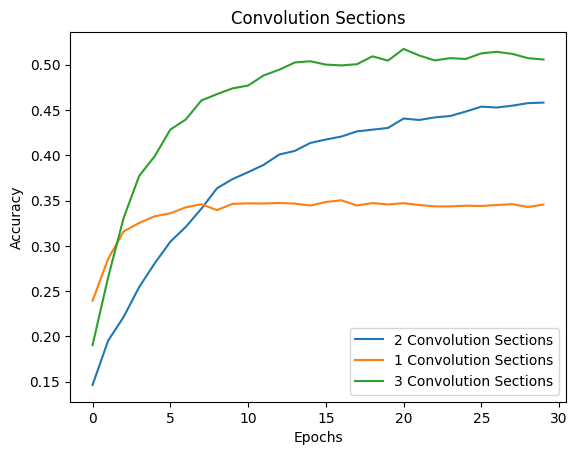

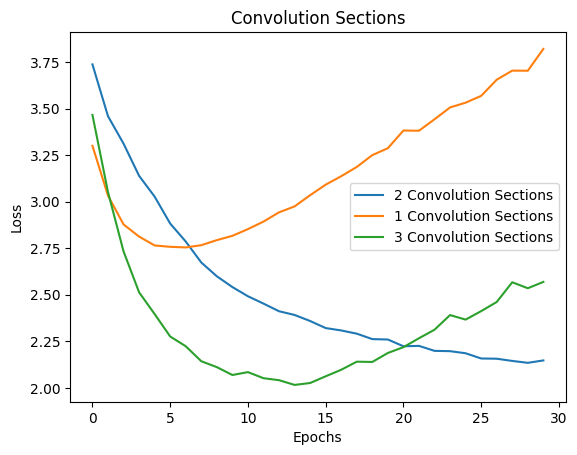

In [64]:
def plot(histories,metric,title):
  for h in histories:
    if(len(h)>4):
      plt.plot(h[0].history[metric],label=h[4])
    else:
      plt.plot(h[0].history[metric])
  plt.legend()
  plt.title(title)
  plt.xlabel("Epochs")
  y = metric.split("_")[-1]
  plt.ylabel(y[0].upper()+y[1:])
  plt.show()

histories[0][4] = "2 Convolution Sections"
histories[3][4] = "1 Convolution Sections"
histories[4][4] = "3 Convolution Sections"
data = [histories[0]]+histories[3:5]
plot(data, 'val_accuracy', 'Convolution Sections')
plot(data, 'val_loss', 'Convolution Sections')